# Homework 2

Deadline: lab session in the week of **25-28.11.2024**
Each task is worth 1 point.

## 1. Maximization of Functions using Gradient Descent



**Task**:
- (a) Maximize the function $f(x) = -x^4 + 4x^2 - 2x + 1$, where $f: \mathbb{R} \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and plot the convergence over iterations.
- (b) Maximize the function $f(x, y, z) = -x^2 - y^2 - z^2 + 2xy - yz + 3z$, where $f: \mathbb{R}^3 \to \mathbb{R}$, using gradient ascent. Implement the optimization using PyTorch and visualize the optimization path.


In [1]:
import torch 
import matplotlib.pyplot as plt
import numpy as np

7.802907943725586


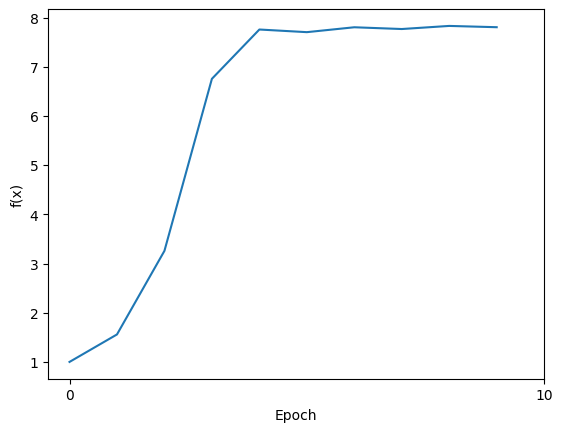

In [53]:
def fa(x):
    return - x**4 + 4 * x**2 - 2*x + 1

x = torch.tensor([0.0], requires_grad=True)
learning_rate = 0.1 
num_epochs = 10
f_values = []

for epoch in range(num_epochs):
    y = fa(x)
    f_values.append(y.item())

    y.backward()

    with torch.no_grad():
        x += learning_rate * x.grad 
        x.grad.zero_()
        
print(f_values[-1])
plt.plot(range(num_epochs), f_values)
plt.xlabel('Epoch')
plt.ylabel('f(x)')
plt.xticks(ticks=range(0, num_epochs + 1, 10))
plt.show()

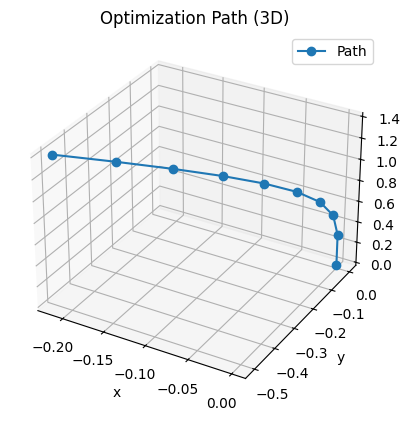

In [54]:
def fb(x, y, z):
    return - x**2 - y**2 - z**2 + 2*x*y - y*z + 3*z 

x = torch.tensor([0.0], requires_grad=True)
y = torch.tensor([0.0], requires_grad=True)
z = torch.tensor([0.0], requires_grad=True)

learning_rate = 0.1
num_epochs = 10
f_values = []

for epoch in range(num_epochs):
    w = fb(x, y, z)
    f_values.append((x.item(), y.item(), z.item()))

    w.backward()

    with torch.no_grad():
        x += learning_rate * x.grad
        y += learning_rate * y.grad
        z += learning_rate * z.grad
        x.grad.zero_()
        y.grad.zero_()
        z.grad.zero_()

f_values = np.array(f_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(f_values[:, 0], f_values[:, 1], f_values[:, 2], marker='o', label="Path")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title("Optimization Path (3D)")
plt.legend()
plt.show()

## 2. Linear Regression in PyTorch


**Dataset**: Use the following code to generate a synthetic dataset with 100 samples, each with one feature:


In [55]:
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon


**Task**: Implement a linear regression model using PyTorch to predict the target variable $y$. Train the model to minimize the Mean Squared Error (MSE).


In [56]:
class LinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

In [57]:
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

model = LinearRegressionModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

num_epochs = 500
loss_values = []

for epoch in range(num_epochs):
    y_pred = model(X_tensor)
    
    loss = criterion(y_pred, y_tensor)
    loss_values.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 50 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [50/500], Loss: 1.6888
Epoch [100/500], Loss: 0.2367
Epoch [150/500], Loss: 0.0406
Epoch [200/500], Loss: 0.0141
Epoch [250/500], Loss: 0.0105
Epoch [300/500], Loss: 0.0100
Epoch [350/500], Loss: 0.0099
Epoch [400/500], Loss: 0.0099
Epoch [450/500], Loss: 0.0099
Epoch [500/500], Loss: 0.0099


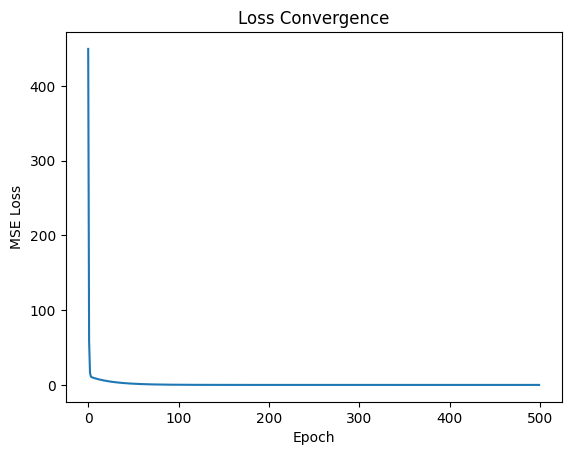

In [58]:
plt.plot(loss_values)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss Convergence")
plt.show()

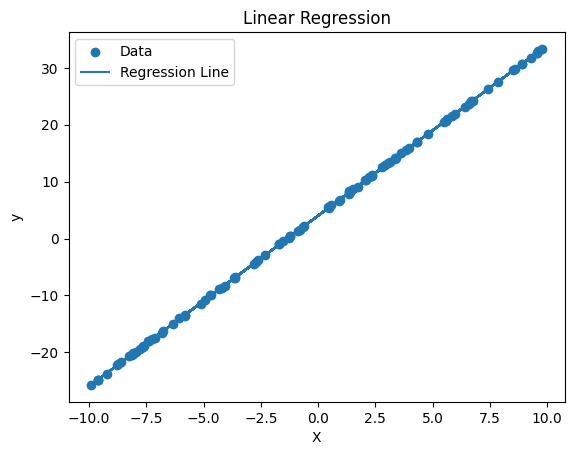

In [59]:
x_test = torch.linspace(-10, 10, 100).unsqueeze(1)  
y_test_pred = model(X_tensor).detach().numpy()  

plt.scatter(X, y, label="Data")
plt.plot(X_tensor.numpy(), y_test_pred, label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression")
plt.show()

## 3. Learning Rate Analysis


**Dataset**: Use the same dataset from Problem 2.

**Task**: Modify the `gradient_descent()` function to include different learning rates (0.01, 0.1, 1.0). Visualize the convergence behaviors of gradient descent with each learning rate.


In [60]:
def gradient_descent(X, y, lr, num_epochs):
    w = 0.0  
    b = 0.0  

    mse_history = []

    n = len(X)  

    for epoch in range(num_epochs):
        y_pred = w * X + b

        dw = (-2 / n) * np.sum((y - y_pred) * X)
        db = (-2 / n) * np.sum(y - y_pred)

        w -= lr * dw
        b -= lr * db

        mse = np.mean((y - y_pred) ** 2)
        mse_history.append(mse)

    return mse_history

In [61]:
learning_rate = [0.01, 0.1, 1.0]
num_epochs = 100 
results = {}

for lr in learning_rate:
    mse_history = gradient_descent(X, y, lr, num_epochs)
    results[lr] = mse_history

/var/folders/71/db_g09c51311049r8gdj12m00000gn/T/ipykernel_2930/1753687059.py:18: RuntimeWarning: overflow encountered in square
  mse = np.mean((y - y_pred) ** 2)


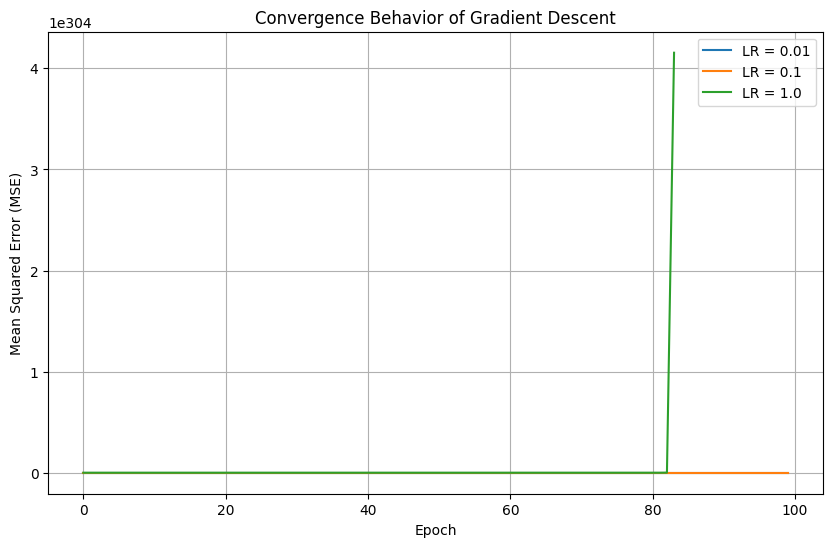

In [62]:
plt.figure(figsize=(10, 6))

for lr, mse_history in results.items():
    plt.plot(range(num_epochs), mse_history, label=f"LR = {lr}")

plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Convergence Behavior of Gradient Descent")
plt.legend()
plt.grid(True)
plt.show()

## 4. Polynomial Regression Extension


**Dataset**: Use the following code to create a dataset of 100 samples:


In [63]:
np.random.seed(1)
X = np.random.uniform(-5, 5, 100)
epsilon = np.random.normal(0, 0.5, 100)
y = 3 * X**3 - 2 * X**2 + 5 + epsilon

In [64]:
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
X_poly = np.vstack((X, X**2, X**3)).T
X_poly_tensor = torch.tensor(X_poly, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


**Task**: Implement polynomial regression of degree 3 using PyTorch. Train the model and compare the training loss to that of a simple linear regression model.


In [ ]:
class PolynomialRegressionModel(torch.nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = torch.nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)
    

def train(model, loss_fn, optimizer, epochs=20, print_loss=True):
    losses = []
    for epoch in range(epochs):
        model.train()
        y_pred = model(X_poly_tensor if model.linear.in_features > 1 else X_tensor.view(-1, 1))
        loss = loss_fn(y_pred, y_tensor)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        losses.append(loss.item())
        
        if print_loss and (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')
    return losses

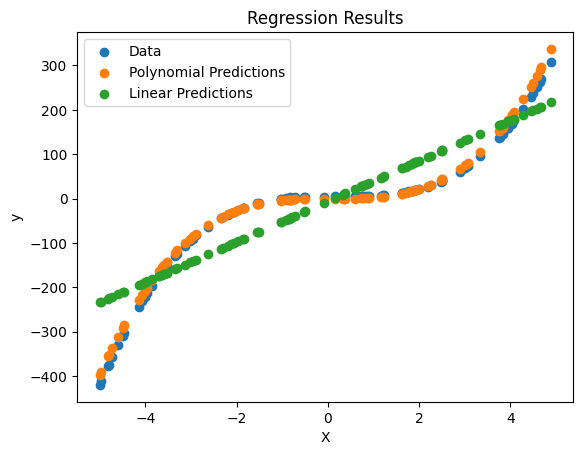

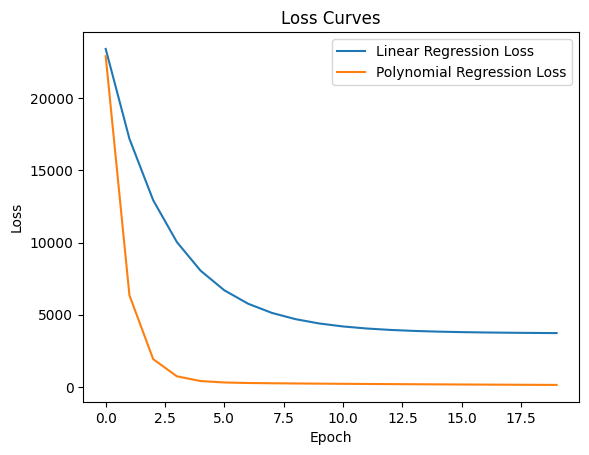

In [66]:
linear_model = LinearRegressionModel()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(linear_model.parameters(), lr=0.01)
linear_losses = train(linear_model, loss_fn, optimizer)

poly_model = PolynomialRegressionModel(3)
optimizer = torch.optim.SGD(poly_model.parameters(), lr=0.0001)
poly_losses = train(poly_model, loss_fn, optimizer)

y_poly_pred = poly_model(X_poly_tensor)
y_linear_pred = linear_model(X_tensor)
plt.scatter(X, y, label="Data")
plt.scatter(X, y_poly_pred.detach().numpy(), label="Polynomial Predictions")
plt.scatter(X, y_linear_pred.detach().numpy(), label="Linear Predictions")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Regression Results")
plt.show()

plt.plot(linear_losses, label="Linear Regression Loss")
plt.plot(poly_losses, label="Polynomial Regression Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Curves")
plt.show()

## 5. Overfitting and Regularization


**Dataset**: Use the following code to generate a dataset with 150 samples:


In [2]:
from sklearn.model_selection import train_test_split

np.random.seed(2)
X = np.random.uniform(-10, 10, 150)
epsilon = np.random.normal(0, 1, 150)
y = 2 * X**2 + 3 * X + 1 + epsilon
X_tensor = torch.tensor(X, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

indices = np.argsort(X)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


**Task**: Fit two models: (i) a linear regression model, and (ii) a polynomial regression model of degree 10. Compare the training and validation performance of both models. Apply L2 regularization to the polynomial model and observe the effect on overfitting.


/Users/dominik/Desktop/University/Semestr5/MachineLearning/pracownia2/.env/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.08433e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/Users/dominik/Desktop/University/Semestr5/MachineLearning/pracownia2/.env/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.6072e-40): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


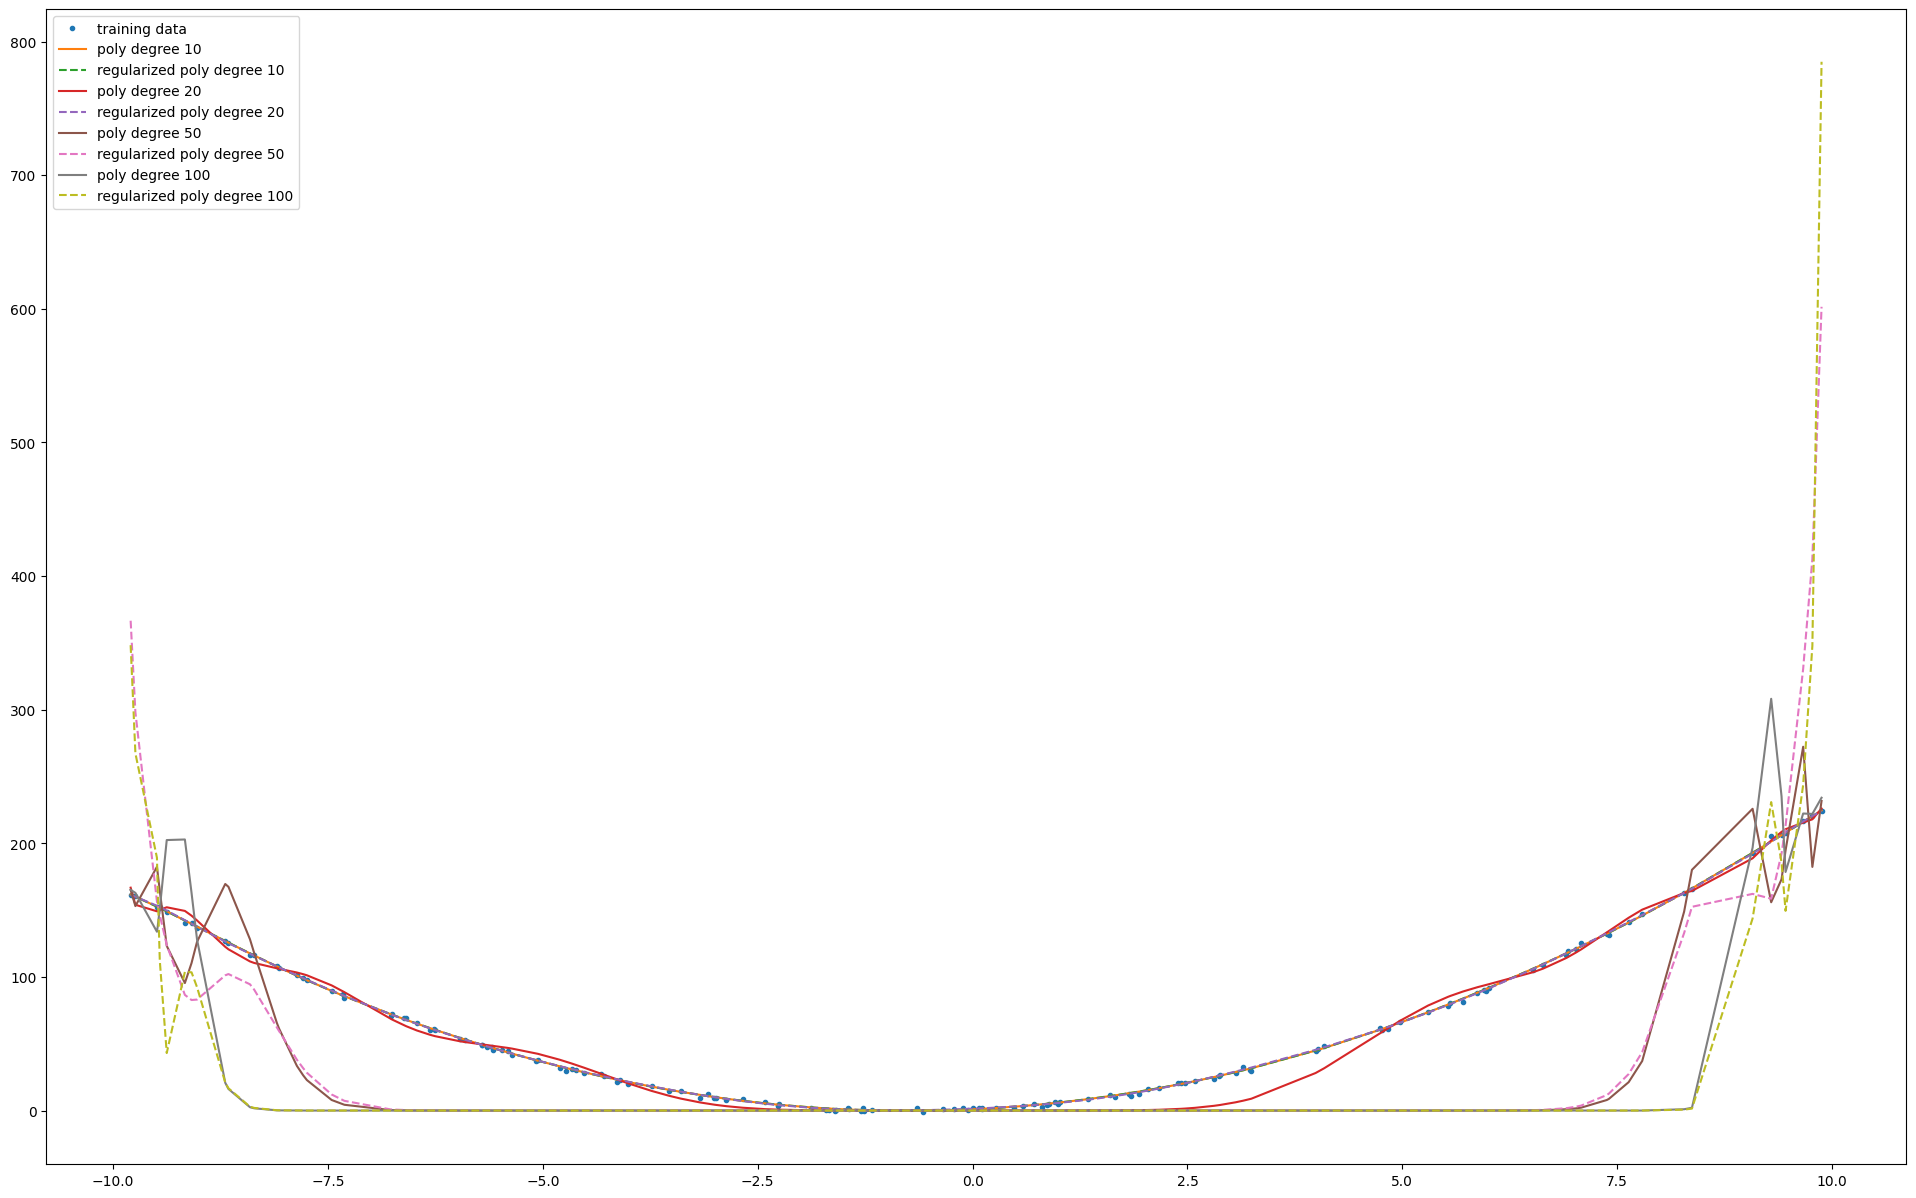

In [8]:
import sklearn.linear_model
def expand(x, d):
    powers = np.arange(d + 1).reshape(1, -1)
    x_expanded = x.reshape(-1, 1) ** powers
    return x_expanded

class PolyRegression(sklearn.linear_model.LinearRegression):
    def __init__(self, degree):
        self.degree = degree
        super().__init__(fit_intercept=False)
    
    def fit(self, x, y):
        return super().fit(expand(x, self.degree), y)

    def predict(self, x):
        return super().predict(expand(x, self.degree)) 
    
class RegularizedPolyRegression(sklearn.linear_model.Ridge):
    def __init__(self, degree, alpha):
        self.degree = degree
        super().__init__(alpha=alpha, fit_intercept=False)
    
    def fit(self, x, y):
        return super().fit(expand(x, self.degree), y)

    def predict(self, x):
        return super().predict(expand(x, self.degree))

plt.figure(figsize=(24, 15))
plt.plot(X, y, '.', label='training data')

for degree in [10, 20, 50, 100]:
    model = PolyRegression(degree).fit(X_train, y_train)
    plt.plot(X, model.predict(X), '-', label=f'poly degree {degree}')

    model = RegularizedPolyRegression(degree, 0.1).fit(X_train, y_train)
    plt.plot(X, model.predict(X), '--', label=f'regularized poly degree {degree}')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
plt.show()

## 6. Custom Gradient Descent in PyTorch


**Dataset**: Use the same dataset from Problem 2.

**Task**: Implement a custom gradient descent algorithm without using an optimizer from `torch.optim`. Train a linear regression model using this custom implementation and compare the training results with those obtained using PyTorch's `SGD` optimizer.


In [69]:
import numpy as np
np.random.seed(0)
X = np.random.uniform(-10, 10, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = 3 * X + 4 + epsilon

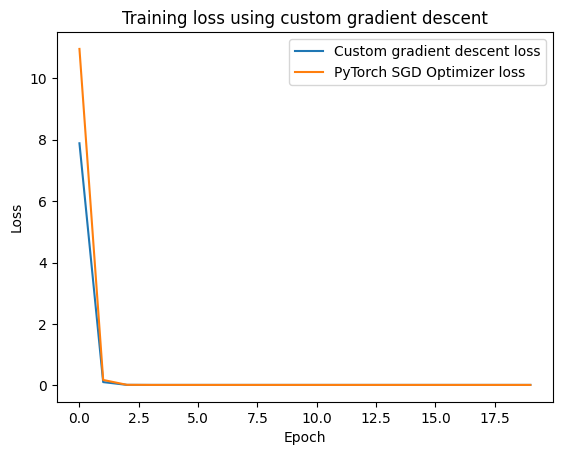

Custom Gradient Descent - Weight: 3.0030081272125244, Bias: 3.9995622634887695
PyTorch SGD Optimizer - Weight: 45.57854080200195, Bias: -5.864873886108398


In [70]:
class CustomLinearRegressionModel(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

def custom_train(model, loss_fn, learning_rate, data, epochs=20, print_loss=True):
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0.0
        for inputs, targets in data:
            inputs = torch.tensor(inputs, dtype=torch.float32).view(-1, 1)
            targets = torch.tensor(targets, dtype=torch.float32).view(-1, 1)
            
            predictions = model(inputs)
                
            loss = loss_fn(predictions, targets)
            epoch_loss += loss.item()
            
            loss.backward()
            
            with torch.no_grad():
                for param in model.parameters():
                    param -= learning_rate * param.grad
                    param.grad.zero_()
            
        losses.append(epoch_loss / len(data)) 
    
    return losses

def sgd_train(model, loss_fn, optimizer, data_loader, epochs=20, print_loss=True):
    losses = []
    for epoch in range(epochs):
        epoch_loss = 0.0
        
        for inputs, targets in data_loader:
            inputs = torch.tensor(inputs, dtype=torch.float32).view(-1, 1)
            targets = torch.tensor(targets, dtype=torch.float32).view(-1, 1)
            
            predictions = model(inputs)
            loss = loss_fn(predictions, targets)
            epoch_loss += loss.item()
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        losses.append(epoch_loss / len(data_loader))
    
    return losses

custom_model = CustomLinearRegressionModel()
sgd_model = CustomLinearRegressionModel()

loss_fn = torch.nn.MSELoss()
learning_rate = 0.01
sgd_optimizer = torch.optim.SGD(sgd_model.parameters(), lr=learning_rate)

data = list(zip(X, y))

custom_losses = custom_train(custom_model, loss_fn, learning_rate, data, epochs=20)
sgd_losses = sgd_train(sgd_model, loss_fn, sgd_optimizer, data, epochs=20)

plt.plot(custom_losses, label="Custom gradient descent loss")
plt.plot(sgd_losses, label="PyTorch SGD Optimizer loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training loss using custom gradient descent")
plt.show()

print(f"Custom Gradient Descent - Weight: {custom_model.linear.weight.item()}, Bias: {custom_model.linear.bias.item()}")
print(f"PyTorch SGD Optimizer - Weight: {linear_model.linear.weight.item()}, Bias: {linear_model.linear.bias.item()}")

## 7. Dataset Size and Convergence


**Dataset**: Use the following code to create three datasets of sizes 50, 100, and 500 samples:


In [71]:
np.random.seed(3)
sizes = [50, 100, 500]
datasets = []
for size in sizes:
    X = np.random.uniform(-10, 10, size)
    epsilon = np.random.normal(0, 0.2, size)
    y = 4 * X - 3 + epsilon
    datasets.append((X, y))


**Task**: Train linear regression models on each dataset using PyTorch. Compare the convergence rates of gradient descent for each dataset size by plotting the training loss over epochs.


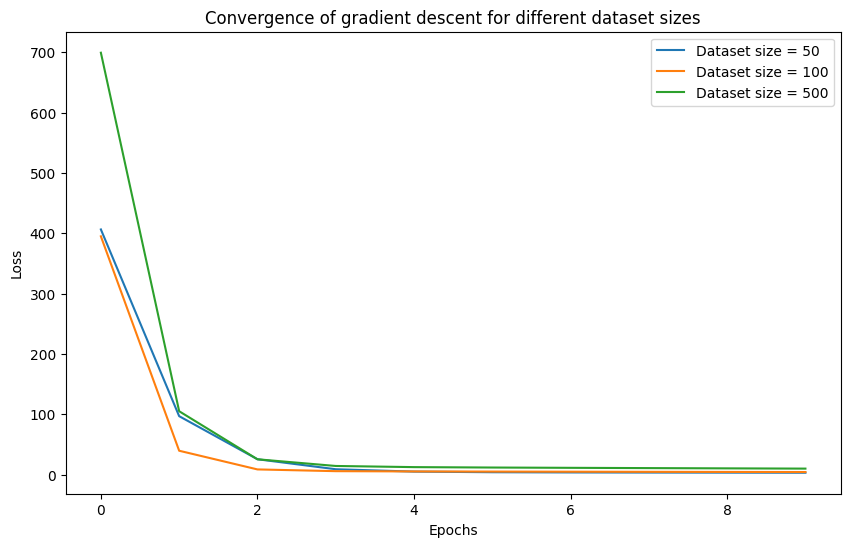

In [72]:
def train(model, loss_fn, optimizer, X_tensor, y_tensor, epochs=10):
    losses = []
    for epoch in range(epochs):
        model.train()
        
        y_pred = model(X_tensor)
        loss = loss_fn(y_pred, y_tensor)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        losses.append(loss.item())
    return losses

def plot_loss_curves(datasets, sizes):
    plt.figure(figsize=(10, 6))
    for (X, y), size in zip(datasets, sizes):
        X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
        y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
        
        model = LinearRegressionModel()
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        loss_fn = torch.nn.MSELoss()
        
        losses = train(model, loss_fn, optimizer, X_tensor, y_tensor, epochs=10)
        
        plt.plot(losses, label=f'Dataset size = {size}')
        
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Convergence of gradient descent for different dataset sizes')
    plt.show()

plot_loss_curves(datasets, sizes)

## 8. Effect of Model Complexity on Overfitting


**Dataset**: Use the following code to generate a dataset of 200 samples:


In [73]:
np.random.seed(4)
X = np.random.uniform(-5, 5, 200)
epsilon = np.random.normal(0, 0.5, 200)
y = 2 * X**2 + X + epsilon

indices = np.argsort(X)
X = X[indices]
y = y[indices]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)


**Task**: Fit polynomial regression models of degrees 5 and 15 to the dataset. Plot the training and validation errors for both models.


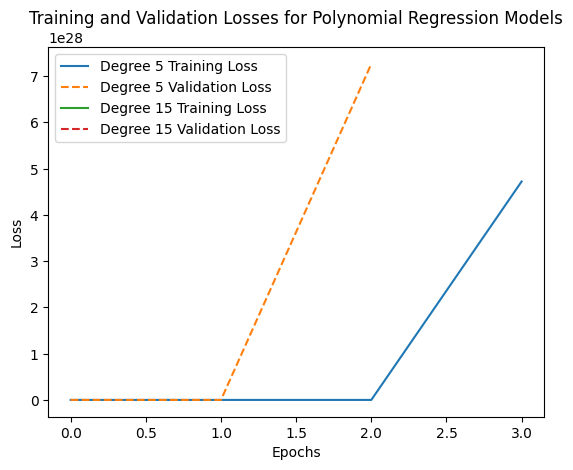

In [74]:
class PolynomialRegression(torch.nn.Module):
    def __init__(self, degree):
        super().__init__()
        self.poly = torch.nn.Linear(degree + 1, 1)

    def forward(self, x):
        return self.poly(x)

def expand_features(x, degree):
    poly_features = [x**i for i in range(degree + 1)]
    return torch.cat(poly_features, dim=1)

def train_model(model, optimizer, loss_fn, X_train, y_train, X_val, y_val, epochs=20):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        model.eval()
        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)
            val_losses.append(val_loss.item())

    return train_losses, val_losses


degrees = [5, 15]
train_losses, val_losses = [], []

for degree in degrees:
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).view(-1, 1)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    X_val_tensor = torch.tensor(X_test, dtype=torch.float32).view(-1, 1)
    y_val_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    X_train_tensor = expand_features(X_train_tensor, degree)
    X_val_tensor = expand_features(X_val_tensor, degree)

    model = PolynomialRegression(degree)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    loss_fn = torch.nn.MSELoss()
    epochs = 20

    _train_losses, _val_losses = train_model(model, optimizer, loss_fn, X_train_tensor, y_train_tensor, X_val_tensor, y_val_tensor, epochs)
    train_losses.append(_train_losses)
    val_losses.append(_val_losses)

    plt.plot(_train_losses, label=f'Degree {degree} Training Loss')
    plt.plot(_val_losses, '--', label=f'Degree {degree} Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Losses for Polynomial Regression Models')
plt.show()

## 9. Gradient Descent for Non-linear Data


**Dataset**: Use the following code to generate a dataset of 100 samples:


In [75]:
np.random.seed(5)
X = np.random.uniform(-2 * np.pi, 2 * np.pi, 100)
epsilon = np.random.normal(0, 0.1, 100)
y = np.sin(X) + epsilon


**Task**: Implement gradient descent to fit a linear model to this dataset. Discuss the challenges and limitations of fitting a linear model to non-linear data.


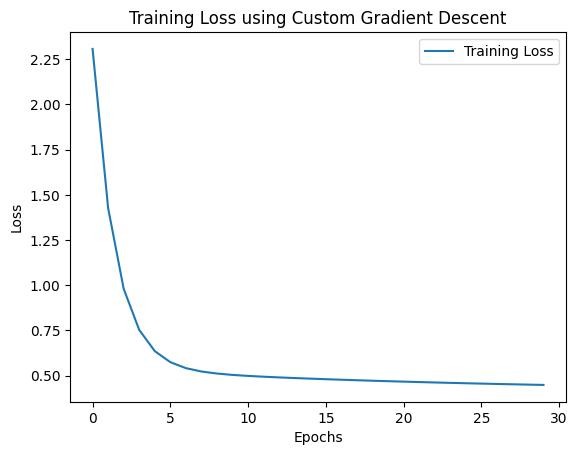

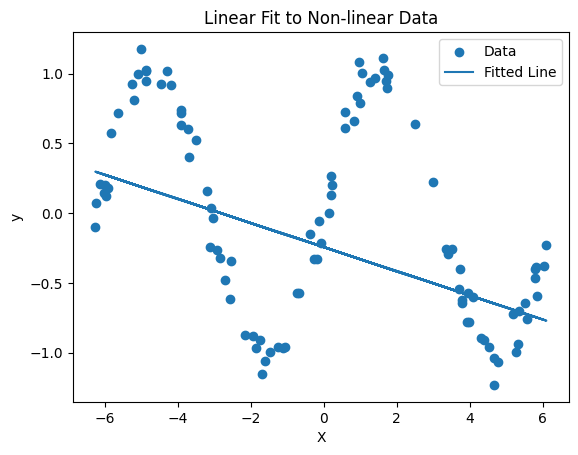

Learned parameters: Weight = -0.08641202747821808, Bias = -0.24406999349594116


In [76]:
def custom_gradient_descent(model, X, y, learning_rate=0.01, epochs=20):
    loss_fn = torch.nn.MSELoss()
    losses = []

    for epoch in range(epochs):
        model.train()
        
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        
        loss.backward()
        
        with torch.no_grad():
            for param in model.parameters():
                param -= learning_rate * param.grad
        
        model.zero_grad()
        
        losses.append(loss.item())
    
    return losses

X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

model = LinearRegressionModel()
losses = custom_gradient_descent(model, X_tensor, y_tensor, learning_rate=0.01, epochs=30)

plt.plot(losses, label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training Loss using Custom Gradient Descent")
plt.show()

model.eval()
with torch.no_grad():
    y_pred = model(X_tensor)

plt.scatter(X, y, label='Data')
plt.plot(X, y_pred.numpy(), label='Fitted Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Linear Fit to Non-linear Data')
plt.show()

print(f"Learned parameters: Weight = {model.linear.weight.item()}, Bias = {model.linear.bias.item()}")